# Bibliotecas Usadas

In [192]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import linregress, t, ttest_ind, norm

# Funções auxiliares e úteis

In [193]:
def padrao_grafico():
    plt.xlim(-1, 9)
    plt.ylim(-1, 9)
    plt.plot([-1, 9], [0, 0], color="black")
    plt.plot([0, 0], [-1, 9], color="black")
    plt.xlabel("Gene X")
    plt.ylabel("Gene Y")

# A)

Os dados da primeira figura, serão dados crescentes no intervalo de 0 a 9

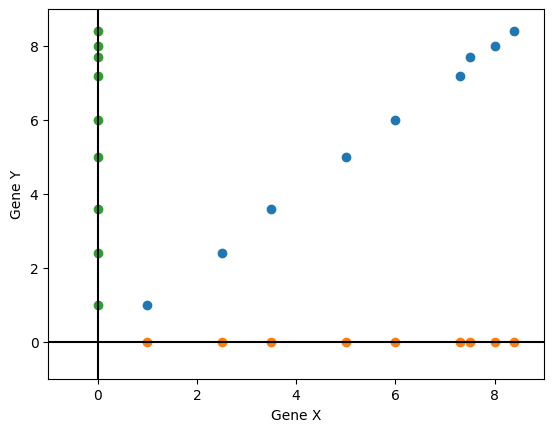

In [194]:
gen_x_figura1 = np.array([1, 2.5, 3.5, 5, 6, 7.3, 7.5, 8, 8.4])
gen_y_figura1 = np.array([1, 2.4, 3.6, 5, 6, 7.2, 7.7, 8, 8.4])
n = 9

padrao_grafico()
plt.scatter(gen_x_figura1, gen_y_figura1)
plt.scatter(gen_x_figura1, [0]*n)
plt.scatter([0]*n, gen_y_figura1)
plt.show()

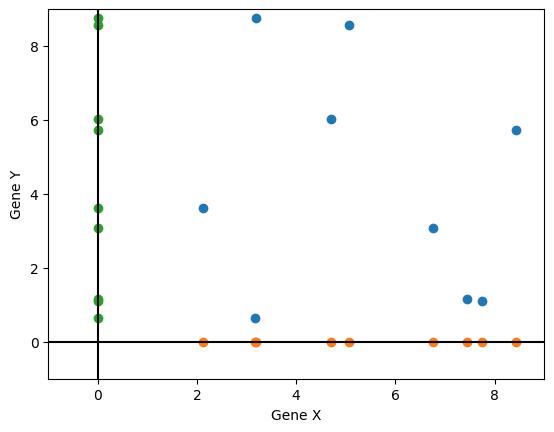

In [195]:
gen_x_figura2 = np.random.uniform(0, 9, 9)
gen_y_figura2 = np.random.uniform(0, 9, 9)
n = 9

padrao_grafico()
plt.scatter(gen_x_figura2, gen_y_figura2)
plt.scatter(gen_x_figura2, [0]*n)
plt.scatter([0]*n, gen_y_figura2)
plt.show()

Com os meus dados em mãos, iremos aplicar a função linregress e recuperaremos o gráfico e o pvalue

## Gráfico 01

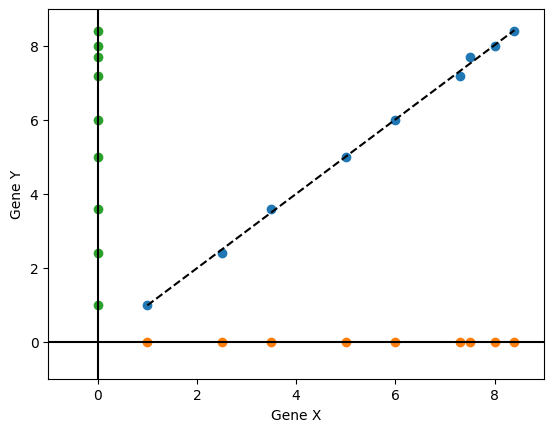

p-value: 1.6878809921670774e-11


In [196]:
slope, intercept, _, p_value, _ = linregress(gen_x_figura1, gen_y_figura1)
regressao_linear_figura1 = (slope * gen_x_figura1) + intercept

padrao_grafico()
plt.scatter(gen_x_figura1, gen_y_figura1)
plt.scatter(gen_x_figura1, [0]*n)
plt.scatter([0]*n, gen_y_figura1)
plt.plot(gen_x_figura1, regressao_linear_figura1, linestyle="--", color="black")
plt.show()
print(f"p-value: {p_value}")

>Observa-se que a reta ajustada acompanha de perto os pontos experimentais, e essa disposição aproximadamente linear dos dados indica a presença de correlação linear entre as variáveis analisadas.
>
>O valor do *p-value* obtido é menor que 0.05, o que fornece forte evidência contra a hipótese nula $H_0$, a qual assume que não há relação linear entre as variáveis, ou seja, que a inclinação da reta é nula $(\text{slope} = 0)$. Dessa forma, pode-se afirmar que a correlação linear observada é estatisticamente significativa.
>
>Como a reta apresenta inclinação positiva, conclui-se que existe uma correlação linear positiva, isto é, as variáveis estão diretamente relacionadas.
>
>Ressalta-se, contudo, que o *p-value* não mede a intensidade da relação entre as variáveis, mas apenas indica se a relação observada pode ser atribuída ao acaso.

## Gráfico 02

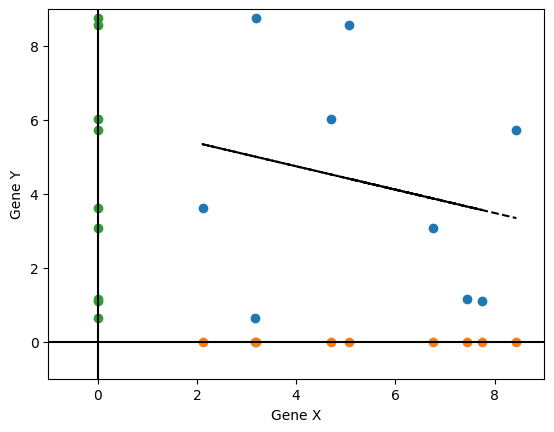

p-value: 0.5492478023199724


In [197]:
slope, intercept, _, p_value, _ = linregress(gen_x_figura2, gen_y_figura2)
regressao_linear_figura2 = (slope * gen_x_figura2) + intercept
n = 9

padrao_grafico()
plt.scatter(gen_x_figura2, gen_y_figura2)
plt.scatter(gen_x_figura2, [0]*n)
plt.scatter([0]*n, gen_y_figura2)
plt.plot(gen_x_figura2, regressao_linear_figura2, linestyle="--", color="black")
plt.show()
print(f"p-value: {p_value}")

>Ainda que a reta ajustada não acompanhe a maioria dos pontos, não é possível concluir a existência de uma relação linear significativa entre as características analisadas apenas pela inspeção visual.
>
>Ao analisar o valor do *p-value*, observa-se que este é superior a 0.05, o que indica ausência de evidência estatística para rejeitar a hipótese nula $H_0$, a qual assume que não há relação linear entre as variáveis, isto é, que a inclinação da reta é nula ($\text{slope} = 0$). Dessa forma, conclui-se que a correlação linear observada não é estatisticamente significativa.

# B)

Considere uma amostra da altura de 20 pessoas da cidade de Belém

In [198]:
print(*[round(x*100)/100 for x in np.random.normal(171, 7, 50)], sep=", ")

176.97, 173.4, 169.42, 177.33, 179.17, 169.25, 158.64, 182.39, 168.36, 160.36, 164.13, 183.26, 171.31, 171.94, 172.55, 176.23, 177.47, 177.58, 166.85, 169.58, 176.41, 180.23, 176.57, 168.59, 184.54, 169.7, 173.95, 162.66, 177.01, 169.24, 166.57, 157.62, 173.01, 172.0, 159.08, 170.11, 168.91, 172.04, 180.47, 179.08, 173.54, 175.17, 161.09, 172.55, 159.28, 168.43, 164.45, 187.54, 180.88, 176.5


In [199]:
altura_alunos = np.array([182.2, 170.3, 165.32, 190.55, 184.3, 166.12, 166.39, 177.43, 170.39, 165.45, 172.79, 164.89, 168.73, 163.92, 
                          178.56, 162.19, 169.96, 167.9, 175.03, 167.85, 165.75, 182.59, 168.25, 156.4, 175.14, 171.06, 186.89, 169.62, 
                          161.89, 164.87, 177.8, 160.64, 176.65, 186.47, 168.73, 167.26, 163.41, 170.99, 158.21, 184.07, 176.54, 170.82, 
                          167.76, 161.56, 169.39, 167.69, 171.35, 163.0, 152.92, 174.39])

Para se calcular o intervalo de confiança, utiliza-se a seguinte formula:

$$\text{intervalo de confiança} = \overline x ± t_{\alpha/2, n -1} \cdot \frac{s}{\sqrt n}$$
Onde:

$ \overline x = \text{media amostral} \\
s = \text{desvio padrão amostral} \\
n = \text{tamanho da amostra} \\
\alpha = 1 - \text{nível de confiança} \\
t_{\alpha/2, n - 1} = \text{valor crítico de t para n - 1 graus de liberdade e para um } \alpha$

In [200]:
# DADOS INICIAS
nivel_confianca = 0.95
n = altura_alunos.size
graus_liberdade = n - 1

# MEDIA AMOSTRAL E DESVIO PADRÃO AMOSTRAL
media = np.mean(altura_alunos)
dp = np.std(altura_alunos, ddof= 1)

O valor de $t_{\alpha/2, n - 1}$ pode ser encontrado pela função t.ppf da biblioteca scipy.stats

In [201]:
t_critico = t.ppf(nivel_confianca, graus_liberdade)
t_critico

np.float64(1.6765508926168535)

Calculando o intervalo de confiança

In [202]:
def intervalo_confiança(
        media_amostral : float, 
        desvio_padrao_amostral : float, 
        nivel_confianca: float, 
        graus_liberdade : float, 
        tamanho_amostral : float) -> tuple[float, float]:
       
    alpha = 1 - nivel_confianca
    erro_padrao = (desvio_padrao_amostral / np.sqrt(tamanho_amostral))

    t_critico = t.ppf((1 - alpha / 2), graus_liberdade)
    limite_inferior = media_amostral - t_critico * erro_padrao
    limite_superior = media_amostral + t_critico * erro_padrao
    return limite_inferior, limite_superior

In [203]:
intervalo_confiança(media, dp, nivel_confianca, graus_liberdade, n)

(np.float64(168.13516038622288), np.float64(172.7600396137771))

Colocando isso em um gráfico

In [204]:
def grafico_distribuicao(dados, media, ic_inf, ic_sup, confianca, title : int, t_distri : bool = False):
    plt.hist(dados, bins=15, density=True, alpha=0.5)

    if t_distri:
        x_t = np.linspace(media - 2*dp, media + 2*dp, 400)
        y_t = t.pdf((x_t - media) / (dp / np.sqrt(n)), df= dados.size - 1) / (dp / np.sqrt(n))
        plt.plot(x_t, y_t, linestyle='--', label="Distribuição t")

    plt.axvspan(ic_inf, ic_sup, alpha=0.3, label=f'IC {confianca}%', color="orange")
    plt.axvline(media, label='Média', color="black")
    plt.title(title)
    plt.legend()
    plt.show()


168.13516038622288 172.7600396137771


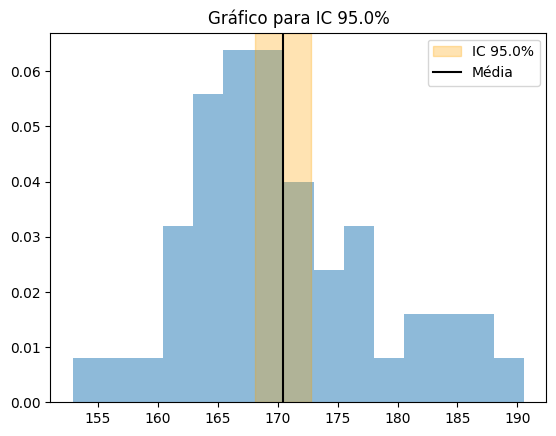

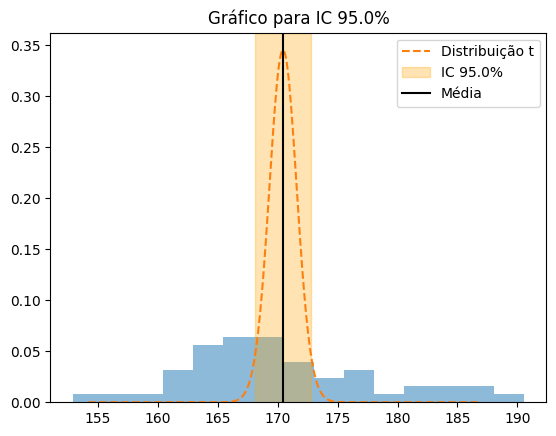

In [205]:
nivel_confianca = 0.95
ic = intervalo_confiança(media, dp, nivel_confianca, graus_liberdade, n)
print(ic[0], ic[1])
grafico_distribuicao(altura_alunos, media, ic[0], ic[1], nivel_confianca*100, f"Gráfico para IC {nivel_confianca*100}%")
grafico_distribuicao(altura_alunos, media, ic[0], ic[1], nivel_confianca*100, f"Gráfico para IC {nivel_confianca*100}%", True)

In [206]:
def mudar_confianca(nivel_confianca):
    ic = intervalo_confiança(media, dp, nivel_confianca, graus_liberdade, n)
    print(ic[0], ic[1])
    grafico_distribuicao(altura_alunos, media, ic[0], ic[1], nivel_confianca*100, f"Gráfico para IC {nivel_confianca*100}%")
    grafico_distribuicao(altura_alunos, media, ic[0], ic[1], nivel_confianca*100, f"Gráfico para IC {nivel_confianca*100}%", True)

169.66565800479208 171.2295419952079


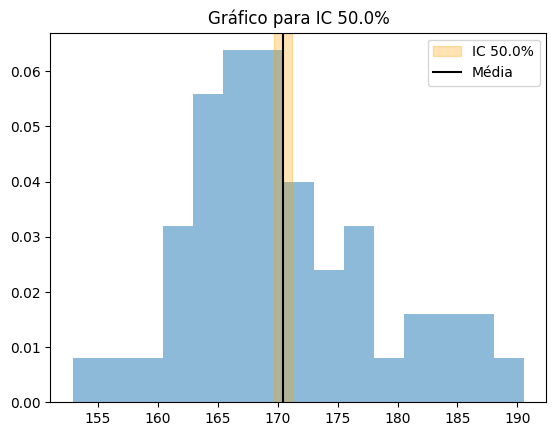

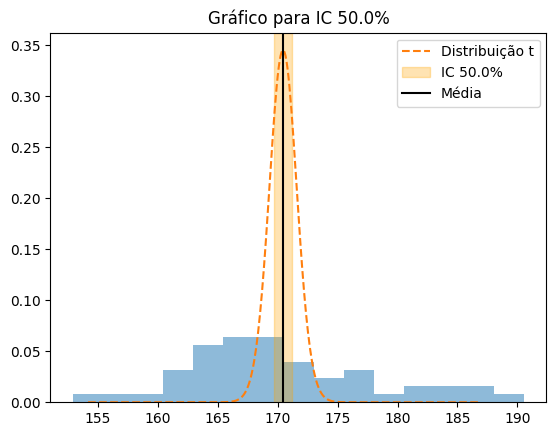

In [207]:
mudar_confianca(0.50)

168.5183750439148 172.3768249560852


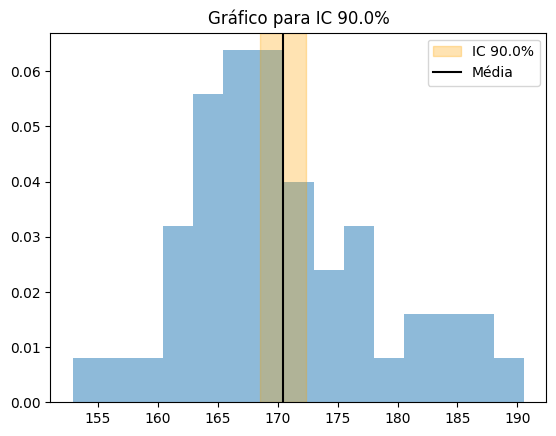

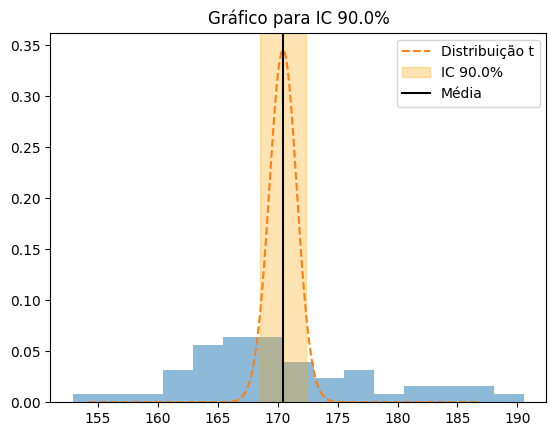

In [208]:
mudar_confianca(0.90)

165.57350508241524 175.32169491758475


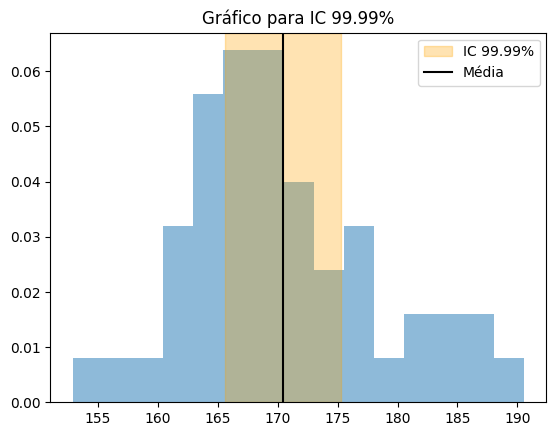

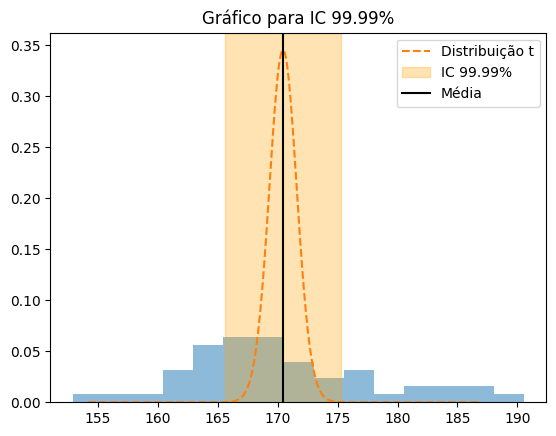

In [209]:
mudar_confianca(0.9999)

O aumento do nível de confiança implica um intervalo mais amplo, refletindo maior segurança estatística à custa de menor precisão na estimativa da média. O inverso também é aplicado, a diminuição do nível de confiança implica um intervalo estrito, menor segurança estatística à custa de maior precisão. 

# C)

Suponha duas moedas, uma justa e outra que não sabemos se é justa ou não, abaixo está uma lista com o número de cara de cada moeda para cada 100 jogadas. Considere os dados de controle, os dados da moeda justa e os dados teste como os dados da moedas que queremos testar.

In [210]:
dados_controle= np.array([47, 56, 48, 48, 52, 50, 50, 51, 49, 47, 53, 46, 51, 48, 49, 53, 49,
                            62, 56, 51, 51, 53, 47, 54, 47, 52, 51, 40, 50, 45, 46, 53, 54, 51,
                            41, 51, 55, 48, 48, 45, 45, 48, 49, 43, 43, 48, 54, 48, 56, 51, 50])

dados_teste = np.array([52, 45, 42, 47, 55, 44, 52, 62, 44, 47, 42, 47, 52, 50, 47, 48, 44,
                        54, 48, 51, 48, 44, 36, 53, 44, 45, 48, 39, 37, 46, 53, 53, 46, 48,
                        51, 44, 53, 50, 52, 46, 48, 45, 50, 49, 53, 41, 44, 50, 50, 42, 53])


Considerando como hipotese nula $H_0$ que ambas as moedas são justas, portanto, possuem a mesma média, temos:

$\text{hipótese nula }(H_0)$:
$$\mu_{1} = \mu_{2} $$

$\text{hipótese alternativa }(H_1)$
$$\mu_{1} \ne \mu_{2} $$
$\mu_{1} = \text{média dos dados de controle}\\
\mu_{2} = \text{média dos dados de teste}$

Agora, realizaremos um teste com as duas amostras para confirmar a hipótese nula

In [211]:
_, p_value = ttest_ind(dados_controle, dados_teste)
print(f"p-value: {p_value:.6f}")

nivel_significancia = 0.05
if p_value < nivel_significancia:
    print("Rejeita a hipótese nula. As médias das diferem")
else:
    print("Falha em rejeitar a hipótese nula.")

p-value: 0.031423
Rejeita a hipótese nula. As médias das diferem


Como visto, o p_value é menor que 0.05, assim a hipótese nula que as médias são iguais foi rejeitada, portanto é possível dizer que a moeda de teste não é justa

# D)

## Análise do código

In [212]:
num_simulations = 10000
sample_size = 30
true_mean = 50
true_std = 10
significance_level = 0.05 #Usar valores diferentes


significant_results = 0


for _ in range(num_simulations):

    group1 = np.random.normal(true_mean, true_std, sample_size)
    group2 = np.random.normal(true_mean, true_std, sample_size)


    t_stat, p_value = ttest_ind(group1, group2)


    if p_value < significance_level:
        significant_results += 1


proportion_significant = significant_results / num_simulations


print(f"Number of simulations: {num_simulations}")
print(f"Significance level (alpha): {significance_level}")
print(f"Proportion of significant results (Type I error rate): {proportion_significant:.4f}")


Number of simulations: 10000
Significance level (alpha): 0.05
Proportion of significant results (Type I error rate): 0.0543


Esse código testa duas amostras de um mesmo grupo e compara em um t-test, depois verifica se o resultado e significante. Ele repete o processo 10000 vezes e guarda quantos resultados significativos foram encontrados. Por fim, faz a proporção da significância.

In [213]:
# Características da amostra e do experimente

num_simulations = 10000 #Quantas vezes o teste será realizado
sample_size = 30 #Tamanho das amostras
true_mean = 50 #Média verdadeira da população
true_std = 10 #Desvio padrão verdadeiro da população

significance_level = 0.01 #Nível de significancia

In [214]:
# Quantidade de resultados significantes
significant_results = 0

for _ in range(num_simulations):

    # Cria as duas amostras
    group1 = np.random.normal(true_mean, true_std, sample_size)
    group2 = np.random.normal(true_mean, true_std, sample_size)

    # Executa um t-test para os dois grupos
    t_stat, p_value = ttest_ind(group1, group2)

    # Analisa se o resultado é significante
    if p_value < significance_level:
        significant_results += 1

# Calcula a proproção dos resultados significantes pelo número de simulações
proportion_significant = significant_results / num_simulations

## Interpretação

Esse código encontra a proporção de significancia em várias simualações de t-test, ou seja, calcula a porcentagem referente a quantidade de vezes que a hipótese nula foi rejeitada. Porém como ambas as amostras vieram de populações de mesma características, a hipótese nula, que as médias são iguais, é verdadeira, assim essa proporção de significancia representa a taxa de erro do Tipo I, isto é, representa quantos desses resultados geraram um falso positivo.

Note que a proporção de significância tende ao nível de significância, isso ocorre pois o nível de significância representa o risco máximo que você aceita correr de concluir que existe um efeito quando, na verdade, não existe, ou seja, um falso positivo. Logo é natural que a proporção da significância converge para o nível de significância

Se testarmos para outros níveis de significancia, a prorpoção de significancia também mudará

In [215]:
num_simulations = 10000
sample_size = 30
true_mean = 50
true_std = 10
significance_level = 0.001 #Usar valores diferentes


significant_results = 0


for _ in range(num_simulations):

    group1 = np.random.normal(true_mean, true_std, sample_size)
    group2 = np.random.normal(true_mean, true_std, sample_size)


    t_stat, p_value = ttest_ind(group1, group2)


    if p_value < significance_level:
        significant_results += 1


proportion_significant = significant_results / num_simulations


print(f"Number of simulations: {num_simulations}")
print(f"Significance level (alpha): {significance_level}")
print(f"Proportion of significant results (Type I error rate): {proportion_significant:.4f}")


Number of simulations: 10000
Significance level (alpha): 0.001
Proportion of significant results (Type I error rate): 0.0011


[link para os slides no canva](https://www.canva.com/design/DAG_ka07zOw/PJqHsiolYdn5te52qC4vcA/edit)

# D)

Dados nosso banco de dados de mulheres e seus batimentos cardiacos em repouso, pergunta-se Qual a média dos batimentos cardíacos da mulheres e qual a proporção de mulheres que possuem altos batimentos cardíacos.

Para isso usarei um t-test para encontrar uma média aproximada e um z-test para encontrar a proporção de mulhere com batimento acima da média

### t-test

Cria a amostra

In [216]:
media_real = 75
desvio_real = 10

amostra = np.array([int(x) for x in np.random.normal(media_real, desvio_real, 50)])
media_amostral = np.mean(amostra)
desvio_amostral = np.std(amostra, ddof=1)
n = amostra.size
amostra

array([72, 71, 67, 73, 64, 96, 78, 62, 76, 61, 77, 57, 77, 68, 61, 78, 78,
       86, 77, 82, 84, 72, 71, 93, 56, 60, 56, 69, 77, 74, 83, 76, 68, 74,
       82, 82, 60, 73, 86, 62, 58, 76, 70, 61, 80, 89, 60, 74, 81, 63])

Defino o nível de confiança e o grau de liberdade para calcular o t-crítico

In [217]:
nivel_confianca = 0.975
graus_liberdade = 49

t_critico = t.ppf(nivel_confianca, graus_liberdade)
t_critico

np.float64(2.0095752371292392)

Calculo o limite superior e inferior

In [218]:
limite_inferior = media_amostral - t_critico * (desvio_amostral / np.sqrt(n))
limite_superior = media_amostral + t_critico * (desvio_amostral / np.sqrt(n))

print(f"Com 95% de confança, o batimento cardiaco média das mulheres está entre {limite_inferior:.3f} e {limite_superior:.3f} bpm")


Com 95% de confança, o batimento cardiaco média das mulheres está entre 69.806 e 75.434 bpm


Z-test

Considerando um batimento cardíaco alto maior ou igual a 90

In [219]:
media_real = 75
desvio_real = 10

amostra = np.array([int(x) for x in np.random.normal(media_real, desvio_real, 50)])
media_amostral = np.mean(amostra)
desvio_amostral = np.std(amostra, ddof=1)
n = amostra.size
amostra

array([ 82,  75,  70,  87,  89,  74,  72,  77,  57,  66,  70,  61,  69,
        67,  86,  67,  68,  80,  55,  67,  76,  83,  88,  79,  66,  86,
       100,  82,  89,  56,  74,  85,  68,  69,  63,  74,  73,  84,  85,
        72,  81,  74,  60,  60,  80,  71,  70,  93,  70,  64])

In [220]:
nivel_confianca = 0.975

z_critico = norm.ppf(nivel_confianca)
z_critico

np.float64(1.959963984540054)

Calculo da proporção da amostra

In [221]:
p = np.mean(amostra >= 90)
p

np.float64(0.04)

In [222]:
limite_inferior = p - z_critico * (np.sqrt(p * (1 - p) / n))
limite_superior = p + z_critico * (np.sqrt(p * (1 - p) / n))

print(f"Com 95% de confiança, a proproção de mulheres com batimentos cardíacos altos está entre {limite_inferior:.3f} e {limite_superior:.3f}")

Com 95% de confiança, a proproção de mulheres com batimentos cardíacos altos está entre -0.014 e 0.094


# F)

In [223]:
from sklearn.linear_model import LinearRegression

## Dados do exemplo

In [224]:
x = np.array([0.9, 1.6, 2.3, 3.8, 4.8, 5.2, 5.4, 5.5, 6])
y = np.array([1.5, 2.5, 1.0, 3.8, 3.5, 3.3, 4.6, 4.3, 5])

x_skl = np.array([[i] for i in x])

model = LinearRegression()
model.fit(x_skl,y)
linear = model.coef_ * np.linspace(0, 7) + model.intercept_

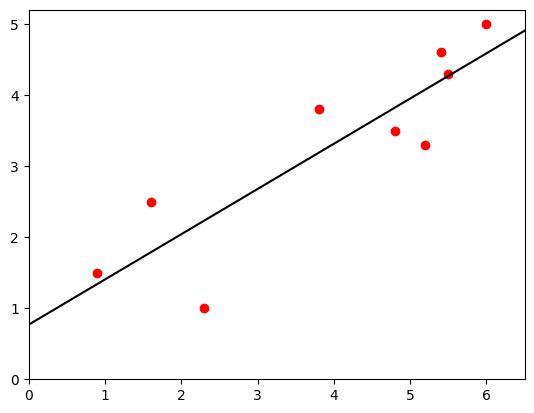

In [225]:
plt.scatter(x, y, color="red")
plt.plot(np.linspace(0, 7), linear, color="black")
plt.xlim(0, 6.5)
plt.ylim(0, 5.2)
plt.show()

# Estatísticas da regrssão linear

In [226]:
import statsmodels.api as sm

In [227]:
x = sm.add_constant(x)
x

array([[1. , 0.9],
       [1. , 1.6],
       [1. , 2.3],
       [1. , 3.8],
       [1. , 4.8],
       [1. , 5.2],
       [1. , 5.4],
       [1. , 5.5],
       [1. , 6. ]])

In [228]:
model2 = sm.OLS(y, x)
results = model2.fit()

## Recupero o b

In [229]:
b = results.params[0]

## Plotar gráficos com 6 diferentes a's

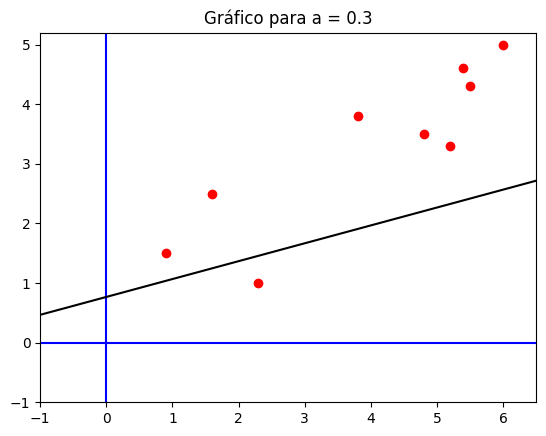

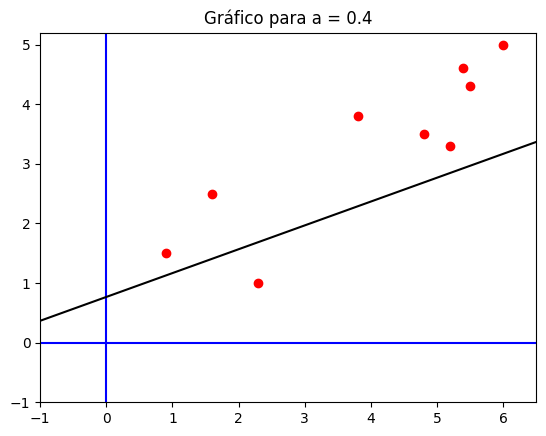

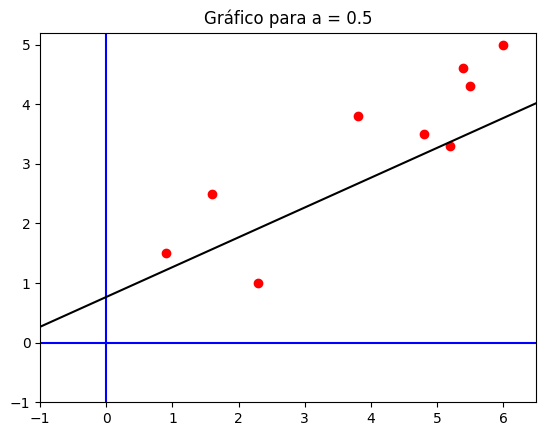

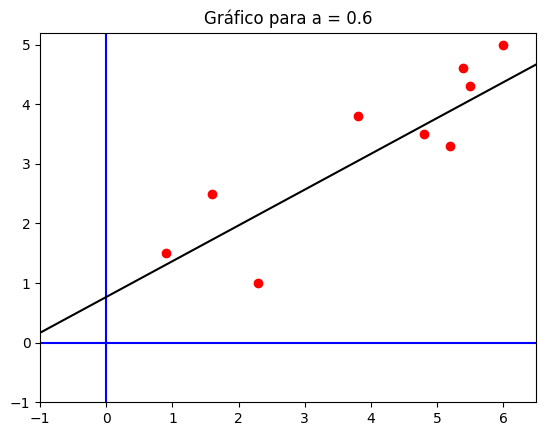

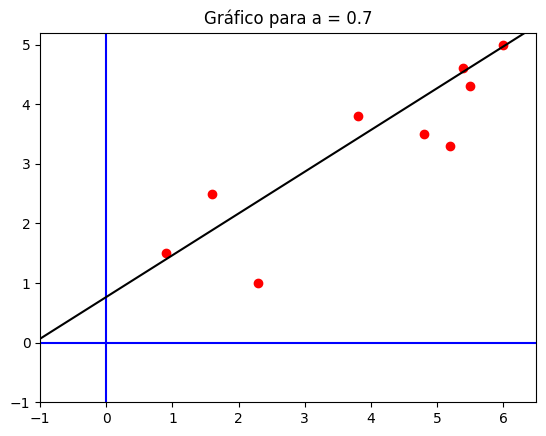

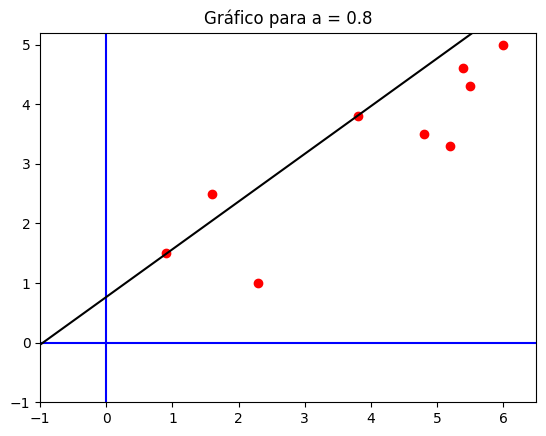

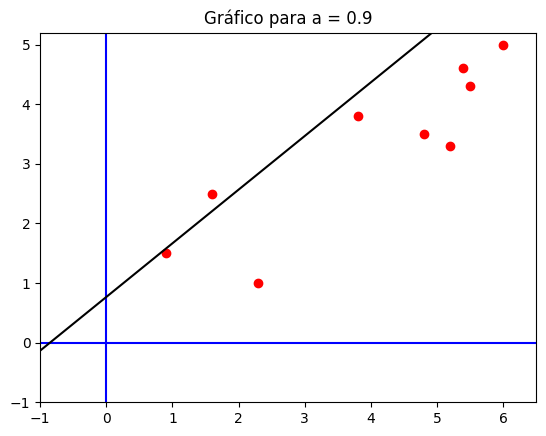

In [230]:
x = np.array([0.9, 1.6, 2.3, 3.8, 4.8, 5.2, 5.4, 5.5, 6])
y = np.array([1.5, 2.5, 1.0, 3.8, 3.5, 3.3, 4.6, 4.3, 5])
x_linear = np.linspace(-2, 7)

a = np.arange(0.3, 0.9, 0.1)

for slope in a:
    f = slope * x_linear + b
    plt.axvline(x=0, ymin=-1.1, ymax=5.3, color="blue")
    plt.axhline(y=0, xmin=-1.1, xmax=6.6, color="blue")
    plt.scatter(x, y, color="red")
    plt.plot(x_linear, f, color="black")
    plt.xlim(-1, 6.5)
    plt.ylim(-1, 5.2)
    plt.title(f"Gráfico para a = {slope:.1f}")
    plt.show()

In [231]:
def erro_quadrado(y_true, regressao_linear):
    soma = 0
    for i in range(len(y_true)):
        soma += (y_true[i] - regressao_linear[i])**2
    return soma / len(y_true)

a = [0.3 0.4 0.5 0.6 0.7 0.8 0.9]
a do scikit-learn: 0.6364661946627248


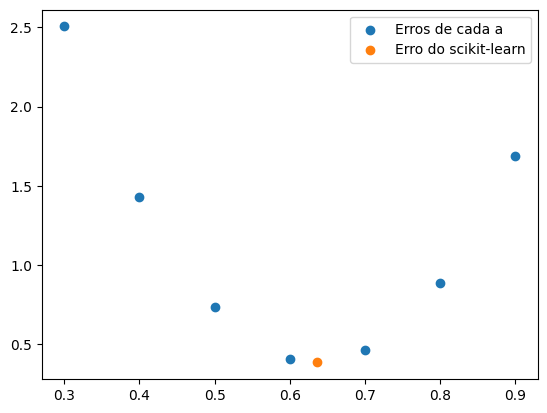

In [232]:
y_pred = model.predict(x_skl)

erros = []

for slope in a:
    f = slope * x + b
    erros.append(erro_quadrado(y, f))


x_skl = np.array([[i] for i in x])
model = LinearRegression()
model.fit(x_skl,y)
linear = model.coef_ * x + model.intercept_

plt.scatter(a, erros, label="Erros de cada a")
plt.scatter(model.coef_, erro_quadrado(y, linear), label="Erro do scikit-learn")
plt.legend()
print(f"a = {a}")
print(f"a do scikit-learn: {model.coef_[0]}")
plt.show()

Cmparando o coeficiente linear do sm e so sk-learn

In [233]:
print(results.params[1], model.coef_[0], sep="\n")

0.6364661946627241
0.6364661946627248


In [238]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     23.37
Date:                Thu, 29 Jan 2026   Prob (F-statistic):            0.00189
Time:                        16:33:24   Log-Likelihood:                -8.4755
No. Observations:                   9   AIC:                             20.95
Df Residuals:                       7   BIC:                             21.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7673      0.570      1.347      0.2

Pelo sumários, percebemos que:

### R-square:
O r-square é 0.77 o que significa que 77% da variabilidade de y foi explicada, mostrando que mais de 70% dos dados foram previstos corretamente

### Adj R-square:
É o r-square ajustado para múltiplas variáveis, como só a uma, ele mantém-se próximo do r-square, sendo 73,7%

### F-statistic:
Mede se o modelo como um todo é significativo. Como o valor é alto (23.37) significa que é um modelo robusto e com muita relevância estatística.
Como ele considere todos os coeficientes, não é possível inferir, só com a estatítisca F, se todos os coeficientes estão alinhados

### prob(F-statistic)
O p-value da estatística F e mede se o modelo é significativo globalmente, ou seja, se o p-value do modelo como um todo. Nessa medida, resultou em 0.001 que é menor que 0.05, o modelo é globalmente válido

## p-value para o a e o b
O p-value de a foi de 0.002, que classifica essa variável como significativa para o modelo, porém o p-value de b foi de 0.22, o que classifica como não significativa.

# G)

# Pseudocódigo

## Pivoteamento e alteração da Matriz A para LU
```Python
para i de 1 até n faça
    p[i] = i # matriz de pivoteamento

para k = 1 até (n-1) faça
    pv = |A[k, k]| # Pivô
    r = k
    para i de (k+1) até n faça # Procura qual o valor na coluna k que está mais distante de zero
        se (|A[i, k]| > pv), então
            pv = |A[i,k]|
            r = i
    se pv = 0 então PARE. # Se o maior valor for igual a 0, quer dizer que a matriz é singular e não é possível fazer um LU
    se r != k, então # Se for acusado que precisa de um pivotemanto
        aux = p(k)
        p(k) = p(r)
        p(r) = aux
        para j de 1 até n, faça # Pivotea
            aux = A[k, j]
            A[k,j] = A[r,j]
            A[r,j] = aux
    para i = (k+1) até n, faça # Transforma a coluna para o esquema do LU
        m = A[i,k] / A[k,k]
        A[i,k] = m
        para j = (k+1) até n, faça
            a[i,j] = a[i,j] - m * A[k,j]
```

## Resolução de sistemas triangulares
```Python
Para i de 1 até n, faça # Pivotea o b
    r = p[i]
    c[i] = b[r]

Para i de 1 até n, faça # Resolve Ly = b
    soma = 0
    para j de 1 até (i-1), faça
        soma = soma + A[i,j] * y[i]
    y[i] = c[i] - soma

Para i de n até 1, faça # Resolve Ux = y
    soma = 0
    para j de (i+1) até n, faça
        soma = soma + A[i,j] * x[j]
    x[i] = (y[i] - soma) / A[i, i]
```

## Exemplo 7
Seja o sistema linear:

$\begin{cases}
    3x_1 - 4x_2 + x_3 = 9 \\
    x_1 + 2x_2 + 2x_3 = 3 \\
    4x_1 + \quad - 3x_3 = -2
\end{cases}$

$A = \begin{pmatrix}
    3 & -4 & 1 \\
    1 & 2 & 2 \\
    4 & 0 & -3
\end{pmatrix}$

In [466]:
def resolver_LU(A, b):
    n = A.shape[0]
    A = A.astype(float)
    b = b.astype(float)

    p = [0]*n
    for i in range(n):
        p[i] = i
    

    for k in range(0, n-1):
        pv = abs(A[k,k]) # Pivô
        r = k # Linha do Pivô

        for i in range(k+1, n): # Verifica qual o maior elemento das linhas k até n da coluna k em valores absolutos
            if abs(A[i, k]) > pv:
                pv = abs(A[i,k])
                r = i

        if pv == 0:
            return None # Matriz singular
    
        if r != k: # Se o maior não estiver na diagonal principal, pivotea                                                                                                                                                    
            aux = p[k]
            p[k] = p[r]
            p[r] = aux

            for j in range(n):
                aux = A[k, j]
                A[k, j] = A[r,j]
                A[r,j] = aux
        
        print(f"MATRIZ DE PIVOTEAMENTO P_{k}")
        P = np.zeros((n, n), float)
        for i in range(3):
            P[i,p[i]] = 1
        display(P)

        for i in range(k+1, n):
            m = A[i,k] / A[k,k]
            A[i,k] = m
            for j in range(k+1, n):
                A[i,j] = A[i,j] - m * A[k,j]
        
        print(f"\n\nMatriz A_{k+1}")
        display(A)
        print('-'*30)
    

    print("Matriz L")
    display(np.array([[1, 0, 0], [A[1,0], 1, 0], [A[2,0], A[2,1], 1]]))

    print("Matriz U")
    display(np.array([[A[0,0], A[0,1], A[0,2]], [0, A[1,1], A[1,2]], [0, 0, A[2,2]]]))

    print('-'*30)

    print("C = pb")
    print("\nB")
    display(b)
    print("C")

    c = np.zeros(n, float)
    for i in range(n):
        r = p[i]
        c[i] = b[r]

    display(c)
    print('-'*30)

    y = np.zeros(n, float)
    for i in range(n):
        soma = 0
        for j in range(i):
            soma += A[i,j] * y[j]
        y[i] = c[i] - soma
    
    print("Y")
    display(y)
    print('-'*30)

    x = np.zeros(n, float)
    for i in range(n-1, -1, -1):
        soma = 0
        for j in range(i+1, n):
            soma += A[i,j] * x[j]
        x[i] = (y[i] - soma) / A[i, i]
    
    return np.array(x)

In [408]:
A = np.array(
    [
        [3.0, -4.0, 1.0],
        [1.0, 2.0, 2.0],
        [4.0, 0.0, -3.0]
    ]
)

b = np.array([9.0, 3.0, -2.0])

n = A.shape[0] # Como é uma matriz quadrada, podemos pegar linha ou coluna que não muda

x = resolver_LU(A, b)
print("X")
x

MATRIZ DE PIVOTEAMENTO P_0


array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])



Matriz A_1


array([[ 4.  ,  0.  , -3.  ],
       [ 0.25,  2.  ,  2.75],
       [ 0.75, -4.  ,  3.25]])

------------------------------
MATRIZ DE PIVOTEAMENTO P_1


array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])



Matriz A_2


array([[ 4.   ,  0.   , -3.   ],
       [ 0.75 , -4.   ,  3.25 ],
       [ 0.25 , -0.5  ,  4.375]])

------------------------------
Matriz L


array([[ 1.  ,  0.  ,  0.  ],
       [ 0.75,  1.  ,  0.  ],
       [ 0.25, -0.5 ,  1.  ]])

Matriz U


array([[ 4.   ,  0.   , -3.   ],
       [ 0.   , -4.   ,  3.25 ],
       [ 0.   ,  0.   ,  4.375]])

------------------------------
C = pb

B


array([ 9.,  3., -2.])

C


array([-2.,  9.,  3.])

------------------------------
Y


array([-2.  , 10.5 ,  8.75])

------------------------------
X


array([ 1., -1.,  2.])

In [409]:
A = np.array(
    [
        [3.0, -4.0, 1.0],
        [1.0, 2.0, 2.0],
        [4.0, 0.0, -3.0]
    ]
)
b = np.array([9.0, 3.0, -2.0])

np.dot(A, np.array([1, -1, 2]))

array([ 9.,  3., -2.])

# H) Método Iterativo de Gauss Jacob

Seja o sistema linear Ax = b e seja $\alpha = (\sum^{n}_{j=1, \ j \ne k} |a_{kj}|) \div |a_{kk}|$. Se $\alpha = \max \alpha _{k} < 1, \ com \ 1 \le k \le n$., Então o\
método de Gauss-Jacobi gera uma sequência {$x^{(k)}$} convergente para a solução do sistema dado, independentemente da escolha da aproximação incial, $x^{(0)}$

In [412]:
def teorema4(A):
    n = A.shape[0]
    alpha = []
    for k in range(n):
        soma = 0
        for j in range(n):
            if k != j:
                soma += A[k,j]
        alpha.append(soma/A[k,k])

    return max(alpha) < 1

In [489]:
def gauss_jacob(A, b, x0, epsilon):
    A = A.astype(float)
    b = b.astype(float)
    n = A.shape[0]

    if not teorema4(A):
        print("O método de Gauss-Jacob não vai convergir")
        return x0

    for i in range(n):
        m = A[i,i]   
        b[i] = b[i] / m
        for j in range(n):
            if i == j:
                A[i,i] = 0
            else:
                A[i,j] = -A[i,j] / m

    print(" X = CX + g")
    print()
    print("Matriz C")
    display(A)
    print("Matriz g")
    display(b)
    print("-"*30)

    n = 0
    while True:
        x1 = np.dot(A, x0) + b
        n += 1
        print(f"Matriz X{n}")
        display(x1)
        print("-"*30)
        erro = max(abs(x1 - x0)) / max(abs(x1))
        if erro < epsilon:
            break
        x0 = x1

    return x1

In [491]:
A = np.array(
    [
        [10., 2., 1.],
        [1., 5., 1.],
        [2., 3., 10.]
    ]
)

b = np.array([7, -8, 6])

x0 = np.array([1, -4, -2])

epsilon = 10e-7

x = gauss_jacob(A, b, x0, epsilon)

print("X")
display(x)


 X = CX + g

Matriz C


array([[ 0. , -0.2, -0.1],
       [-0.2,  0. , -0.2],
       [-0.2, -0.3,  0. ]])

Matriz g


array([ 0.7, -1.6,  0.6])

------------------------------
Matriz X1


array([ 1.7, -1.4,  1.6])

------------------------------
Matriz X2


array([ 0.82, -2.26,  0.68])

------------------------------
Matriz X3


array([ 1.084, -1.9  ,  1.114])

------------------------------
Matriz X4


array([ 0.9686, -2.0396,  0.9532])

------------------------------
Matriz X5


array([ 1.0126 , -1.98436,  1.01816])

------------------------------
Matriz X6


array([ 0.995056, -2.006152,  0.992788])

------------------------------
Matriz X7


array([ 1.0019516, -1.9975688,  1.0028344])

------------------------------
Matriz X8


array([ 0.99923032, -2.0009572 ,  0.99888032])

------------------------------
Matriz X9


array([ 1.00030341, -1.99962213,  1.0004411 ])

------------------------------
Matriz X10


array([ 0.99988032, -2.0001489 ,  0.99982596])

------------------------------
Matriz X11


array([ 1.00004718, -1.99994125,  1.00006861])

------------------------------
Matriz X12


array([ 0.99998139, -2.00002316,  0.99997294])

------------------------------
Matriz X13


array([ 1.00000734, -1.99999087,  1.00001067])

------------------------------
Matriz X14


array([ 0.99999711, -2.0000036 ,  0.99999579])

------------------------------
Matriz X15


array([ 1.00000114, -1.99999858,  1.00000166])

------------------------------
Matriz X16


array([ 0.99999955, -2.00000056,  0.99999935])

------------------------------
Matriz X17


array([ 1.00000018, -1.99999978,  1.00000026])

------------------------------
X


array([ 1.00000018, -1.99999978,  1.00000026])